##Imports

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from keras.datasets import mnist

##Part1

In [45]:
def pca(X):
    mean = np.mean(X, axis=0)

    U, s, Vt = np.linalg.svd(X - mean)

    vectors = Vt.T ##eigenvectors
    weights = s**2 / (X.shape[0] - 1) ##eigenvalues

    return mean, weights, vectors


##Part2

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Before Reshape:')
print('Train Shape:',x_train.shape)
print('Class Shape:',y_train.shape)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])

print('\n\nAfter Reshape: ')
print('Train Shape:',x_train.shape)
print('Class Shape:',y_train.shape)

Before Reshape:
Train Shape: (60000, 28, 28)
Class Shape: (60000,)


After Reshape: 
Train Shape: (60000, 784)
Class Shape: (60000,)


In [47]:
##choose randomly 1000 images
randomOrder = np.arange(x_train.shape[0])
np.random.shuffle(randomOrder)

X_TrainSet = x_train[randomOrder[:1000]]
Y_TrainSet = y_train[randomOrder[:1000]]

print('Train Set Shape:',X_TrainSet.shape)
print('Train Class Shape:',Y_TrainSet.shape)

mean_vector, weight, pc_vectors = pca(X_TrainSet)

Train Set Shape: (1000, 784)
Train Class Shape: (1000,)


##Plots

<ipython-input-48-545eda15cbe5>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


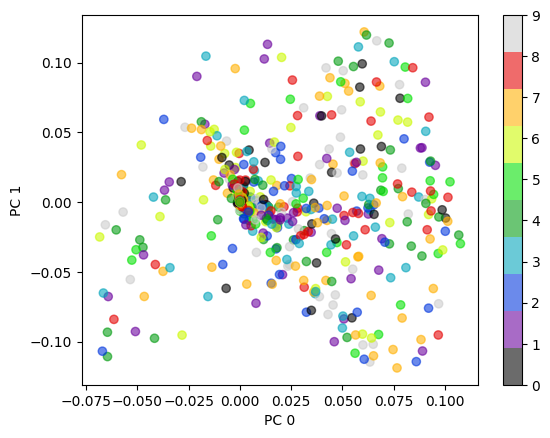

In [48]:
##PC0 - PC1
plt.scatter(pc_vectors[:, 0],pc_vectors[:, 1],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.colorbar()

<ipython-input-49-7de687cead88>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


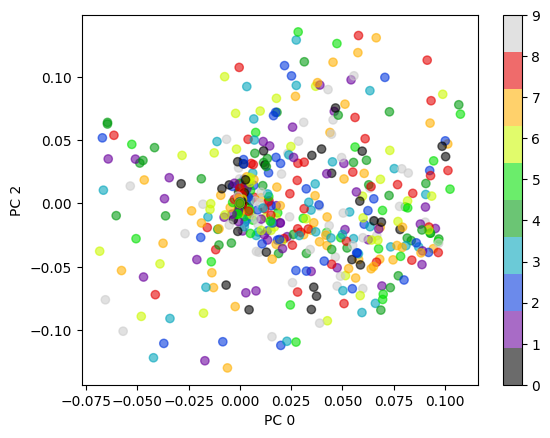

In [49]:
##PC= - PC2
plt.scatter(pc_vectors[:, 0],pc_vectors[:, 2],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 0')
plt.ylabel('PC 2')
plt.colorbar()

<ipython-input-50-7b785602afa2>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


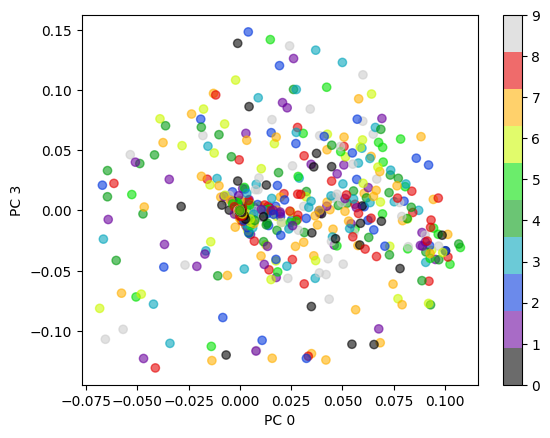

In [50]:
##PC0 - PC3
plt.scatter(pc_vectors[:, 0],pc_vectors[:, 3],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 0')
plt.ylabel('PC 3')
plt.colorbar();

<ipython-input-51-940b92e3d821>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


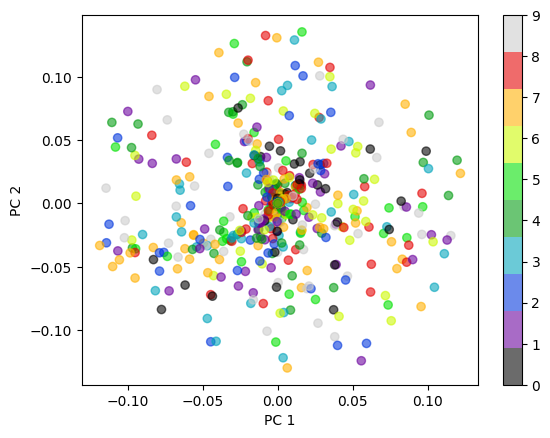

In [51]:
##PC1- PC2
plt.scatter(pc_vectors[:, 1],pc_vectors[:, 2],
            c=Y_TrainSet[:784], alpha=0.58,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()

##K-Fold

In [52]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=20)
mean_vector, weight, pc_vectors = pca(X_TrainSet)

for train_index, test_index in kf.split(pc_vectors):
    ktrainSetX, ktestSetX = X_TrainSet[train_index], X_TrainSet[test_index]
    ktrainSetY, ktestSetY = Y_TrainSet[train_index], Y_TrainSet[test_index]

    print('Train Set Shape:',ktrainSetX.shape)
    print('Train Class Shape:',ktrainSetY.shape)
    print('Test Set Shape:',ktestSetX.shape)

    clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=0)
    clf.fit(ktrainSetX, ktrainSetY)
    y_pred = clf.predict(ktestSetX)

    print('Accuracy: ', accuracy_score(ktestSetY, y_pred))
    print('\n\n')


Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.89171974522293



Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.8789808917197452



Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.8726114649681529



Train Set Shape: (627, 784)
Train Class Shape: (627,)
Test Set Shape: (157, 784)
Accuracy:  0.89171974522293



Train Set Shape: (628, 784)
Train Class Shape: (628,)
Test Set Shape: (156, 784)
Accuracy:  0.8525641025641025



